#Process Mining Project 2025/2026

Groups: up to 5 people.

## Project Part I (deadline: 13.01) — 70%

Develop an algorithm and its implementation that can automatically decompose complex DFG models into smaller, manageable subprocesses by identifying key model components and splitting them into subprocesses.
You may use GPT to identify the elements and to name (label) each subprocess.
Provide a user interface that allows zooming in and out of the decomposed graph.
Test the algorithm on several sample logs.

*Projects must be presented in class on 13.01, where we will test them using various sample examples.*

## Project Part II (deadline: 27.01) — 30%

Adapt your solution to BPMN models. This includes enabling automatic decomposition of BPMN process models into smaller subprocesses using the approach developed in Part I, as well as naming (labeling) the identified subprocesses.

Test the adapted solution on several sample BPMN models.

*Projects must be presented in class on 27.01, where we will test them using various sample examples.*

# Tools

You can use various tools and techniques, but you will need to present your solutions and test it live 13.01 and possibly 27.01.

For discovery of DFG or BPMN models, you can use the [PM4Py](https://processintelligence.solutions/pm4py) library.

For displaying BPMN models, I suggest using [bpmn.js](https://bpmn.io/toolkit/bpmn-js/) and optionally [bpmn-python](https://github.com/KrzyHonk/bpmn-python/pull/48).

## Installation of PM4Py

## Importing modules

In [10]:
import pandas as pd
import zipfile
import os
import pm4py

## Log Input

For testing purposes, let's first use the previous repair example log. Let's convert the model to the suitable dataframe.

In [11]:
df = pd.read_csv('../data/repairExample.csv')
df['Start'] = pd.to_datetime(df['Start Timestamp'])
df = pm4py.format_dataframe(df, case_id='Case ID', activity_key='Activity', timestamp_key='Start')
event_log = pm4py.convert_to_event_log(df)

## Process model discovery

We will try to discover various types of models using different algorithms.

### Discovering Directly Follows Graph

Let's start with the directly follows graph (dfg), which we know from the previous part of the workshop:

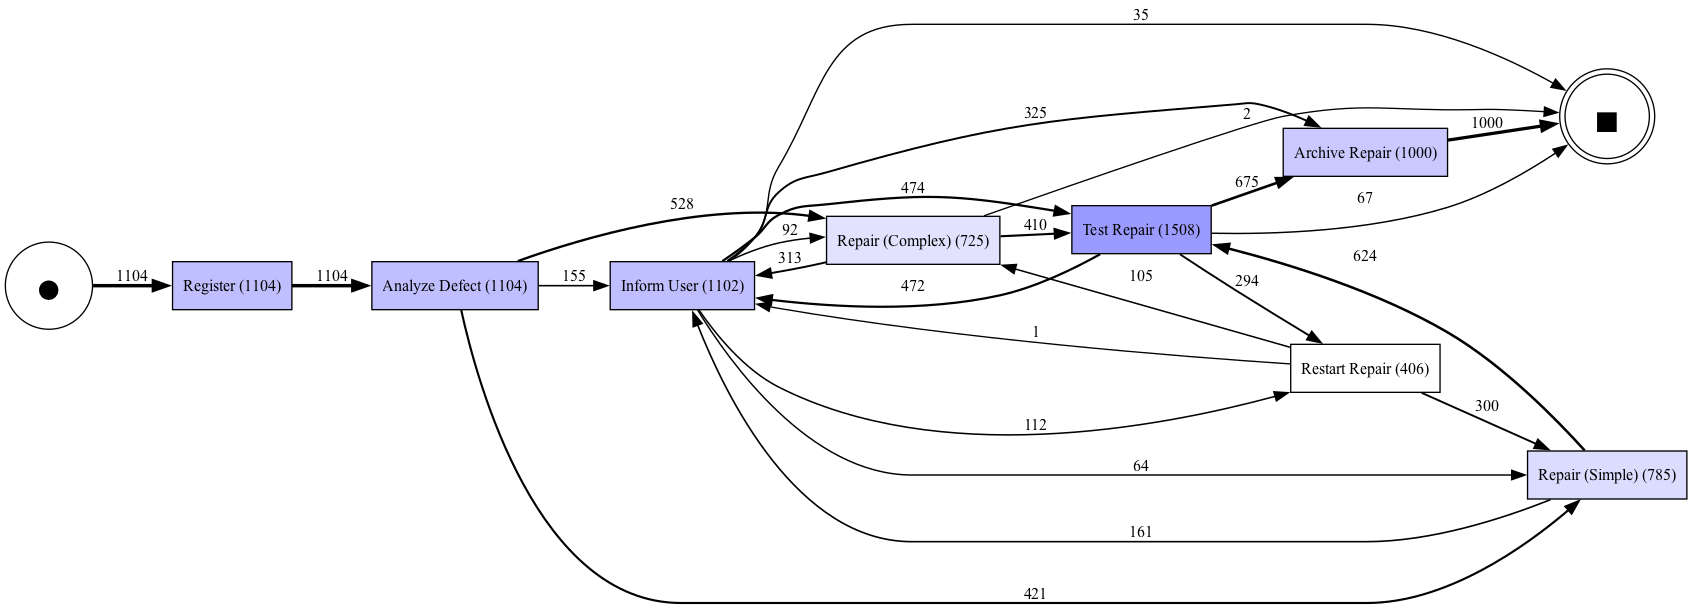

In [12]:
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

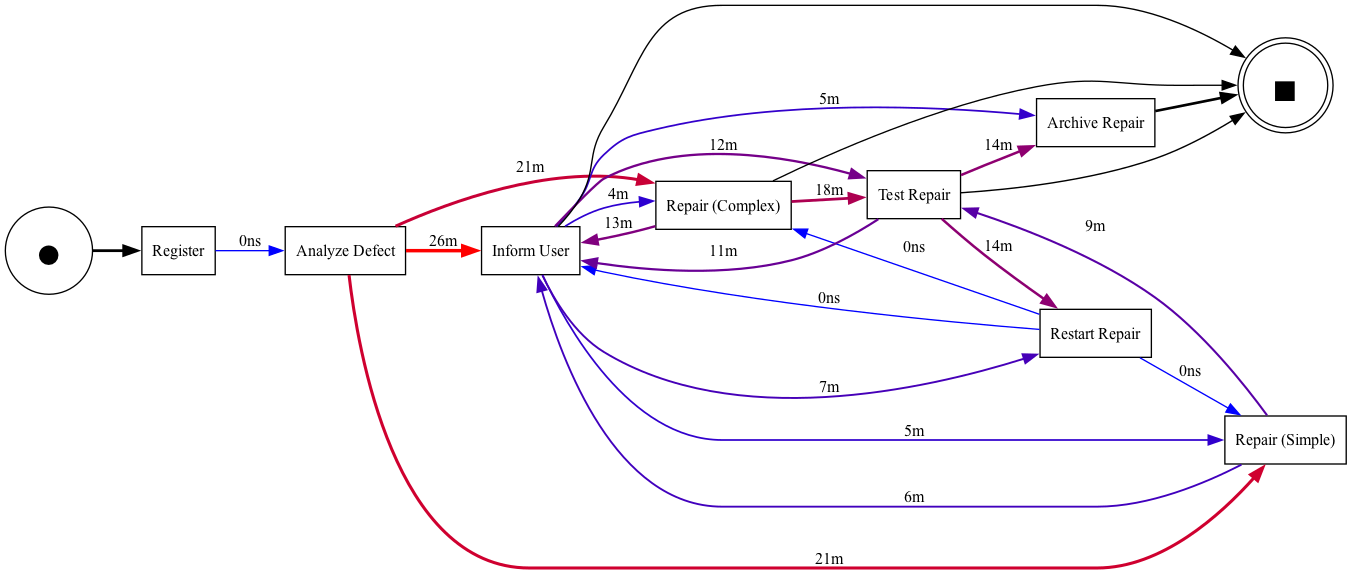

In [13]:
performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(event_log)
pm4py.view_performance_dfg(performance_dfg, start_activities, end_activities)


### Discovering Petri Nets

Most algorithms from PM4Py can discover Petri nets.

You can choose one of the four algorithms:
  * Alpha,
  * Alpha Plus,
  * Heuristics,
  * Inductive.

Let's try with the simplest one, i.e. Alpha Algorithm:

replaying log with TBR, completed traces ::   0%|          | 0/60 [00:00<?, ?it/s]

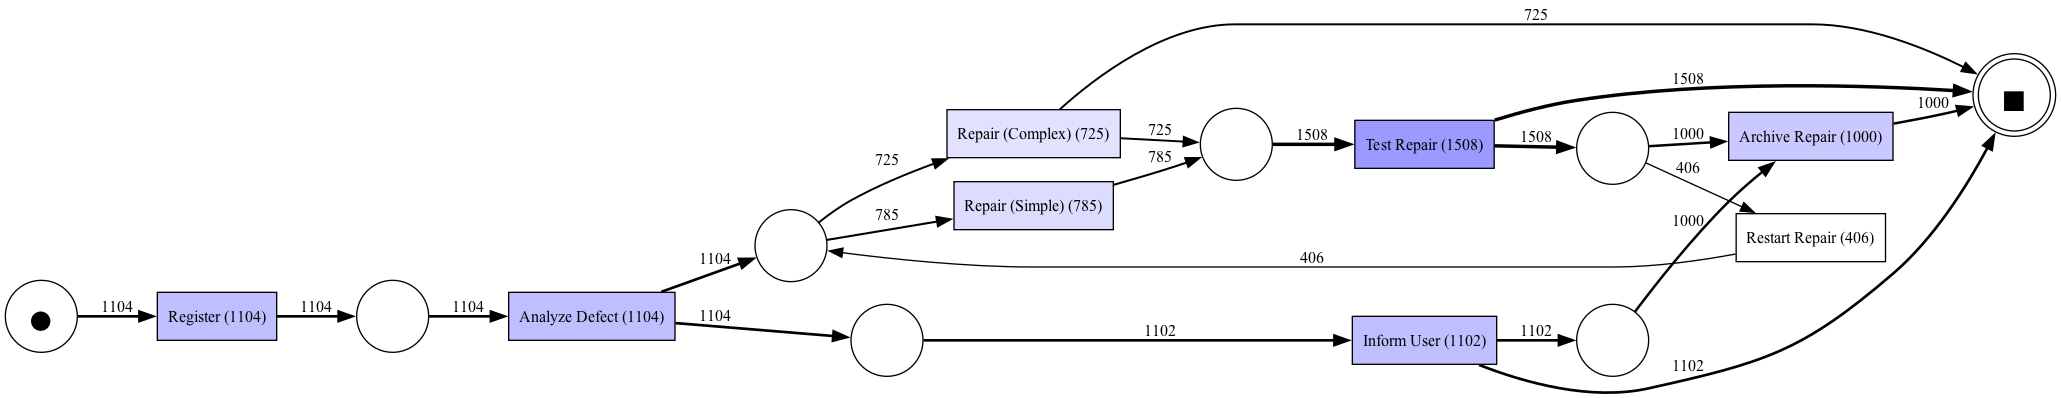

In [14]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
net, im, fm = pm4py.discover_petri_net_alpha(event_log)
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, im, fm, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=event_log)
pn_visualizer.view(gviz)

To assess the obtained Petri net model, we can use some metrics, such as:
  * fitness,
  * precision,
  * generalization,
  * simplicity.

As a single metric is not enough to assess the model, the weighted average or fscore might be more useful.

In [15]:
from pm4py.algo.evaluation import algorithm as evaluator
evaluator.apply(event_log, net, im, fm)

replaying log with TBR, completed traces ::   0%|          | 0/60 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/103 [00:00<?, ?it/s]

{'fitness': {'perc_fit_traces': 0.0,
  'average_trace_fitness': 0.8702419157773597,
  'log_fitness': 0.8704903216087971,
  'percentage_of_fitting_traces': 0.0},
 'precision': 0.9826772814388913,
 'generalization': 0.9662311825276741,
 'simplicity': 0.6153846153846154,
 'metricsAverageWeight': 0.8586958502399945,
 'fscore': 0.9231880174794813}

### Discovering BPMN process model

The PM4Py library also allows you to discover the BPMN model using Inductive Miner:

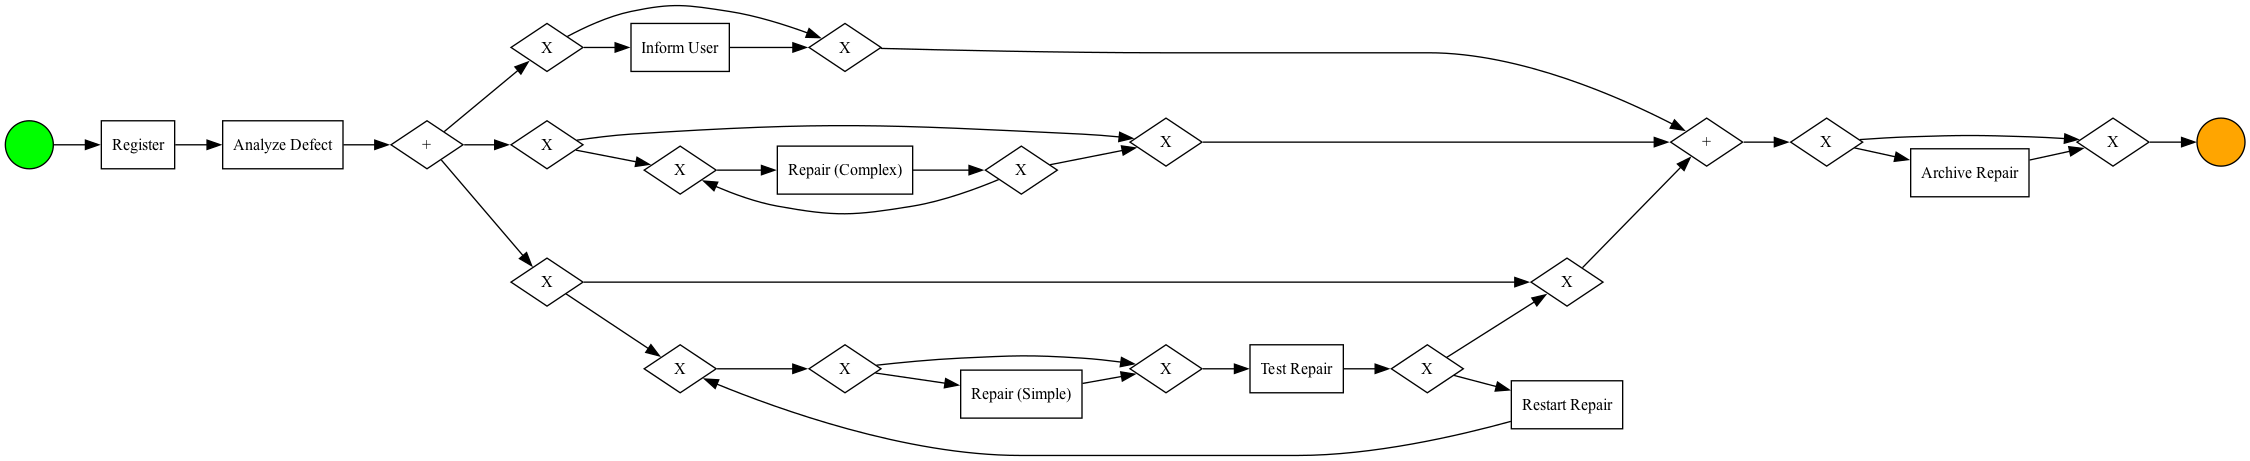

In [16]:
process_model = pm4py.discover_bpmn_inductive(event_log)
pm4py.view_bpmn(process_model)